In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

%matplotlib widget

In [19]:
x, y = sp.symbols("x,y")


def get_equation(n0, n1, s0, s1):
    f = x**2 + y**2
    g = y**2 + (s0 + s1 - x) ** 2
    h = n0 * s0 + n1 * s1
    return n0**2 * f + n1**2 * g - h**2


n0 = 1
n1 = 2
s0 = 10
s1 = 10

eq = get_equation(n0, n1, s0, s1)
sp.pretty_print(eq)

 2      2             2      
x  + 5⋅y  + 4⋅(20 - x)  - 900


In [20]:
solutions = sp.solve(eq, x)
s1_lambda = sp.lambdify(y, solutions[0])
s2_lambda = sp.lambdify(y, solutions[1])

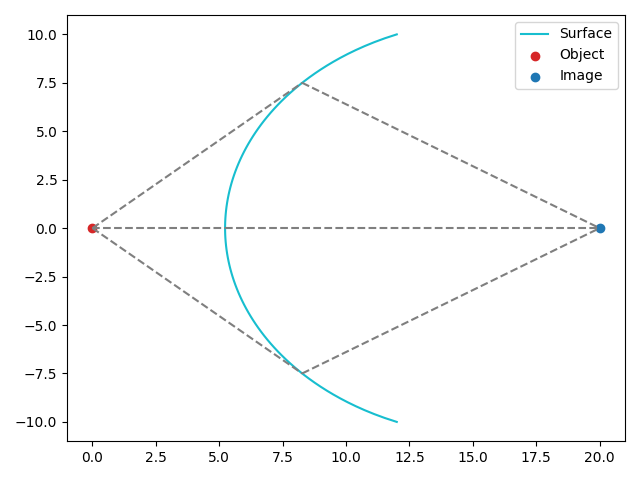

In [21]:
y_plot = np.linspace(-10, 10, 100)

plt.figure()
plt.scatter(x=0, y=0, color="tab:red", label="Object")
plt.scatter(x=s0 + s1, y=0, color="tab:blue", label="Image")
plt.plot(s1_lambda(y_plot), y_plot, color="tab:cyan", label="Surface")

# Optical axis ray
plt.plot([0, s1_lambda(0)], [0, 0], color="tab:grey", linestyle="--")
plt.plot([s1_lambda(0), s0 + s1], [0, 0], color="tab:grey", linestyle="--")

# Top ray
plt.plot([0, s1_lambda(7.5)], [0, 7.5], color="tab:grey", linestyle="--")
plt.plot([s1_lambda(7.5), s0 + s1], [7.5, 0], color="tab:grey", linestyle="--")

# Bottom ray
plt.plot([0, s1_lambda(-7.5)], [0, -7.5], color="tab:grey", linestyle="--")
plt.plot([s1_lambda(-7.5), s0 + s1], [-7.5, 0], color="tab:grey", linestyle="--")

plt.legend()
plt.tight_layout()

## Interactive plot

In [5]:
from ipywidgets import FloatSlider, interact

In [6]:
def get_equation(n0, n1, s0, s1):
    f = x**2 + y**2
    g = y**2 + (s0 + s1 - x) ** 2
    h = n0 * s0 + n1 * s1
    return n0**2 * f + n1**2 * g - h**2


def get_solution(n0, n1, s0, s1):
    eq = get_equation(n0, n1, s0, s1)
    solutions = sp.solve(eq, x)
    solution = sp.lambdify(y, solutions[0])
    return solution

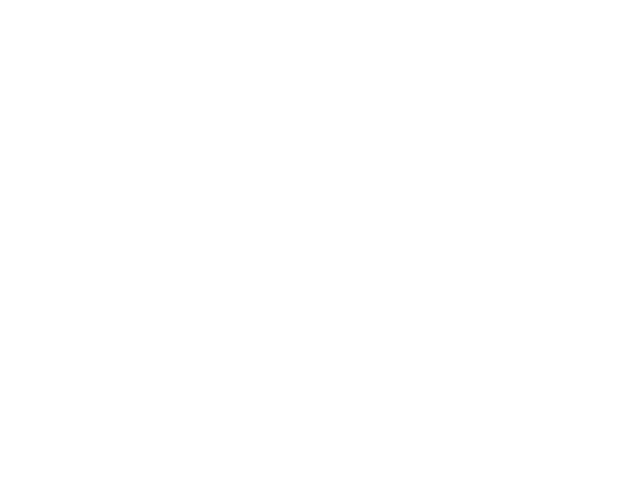

interactive(children=(FloatSlider(value=1.5, description='n1', max=3.0, min=1.0), FloatSlider(value=10.0, desc…

<function __main__.update_plot(n1, s0, s1)>

In [10]:
plt.figure()
plt.show()

n1_slider = FloatSlider(min=1, max=3, value=1.5)
s0_slider = FloatSlider(min=10, max=1000, value=10)
s1_slider = FloatSlider(min=10, max=200, value=100)


def update_plot(n1, s0, s1):
    n0 = 1
    s1_lambda = get_solution(n0, n1, s0, s1)

    plt.gca().clear()
    y_plot = np.linspace(-10, 10, 100)

    plt.scatter(x=0, y=0, color="tab:red", label="Object")
    plt.scatter(x=s0 + s1, y=0, color="tab:blue", label="Image")
    plt.plot(s1_lambda(y_plot), y_plot, color="tab:cyan", label="Surface")

    # Optical axis ray
    plt.plot([0, s1_lambda(0)], [0, 0], color="tab:grey", linestyle="--")
    plt.plot([s1_lambda(0), s0 + s1], [0, 0], color="tab:grey", linestyle="--")

    # Top ray
    plt.plot([0, s1_lambda(7.5)], [0, 7.5], color="tab:grey", linestyle="--")
    plt.plot([s1_lambda(7.5), s0 + s1], [7.5, 0], color="tab:grey", linestyle="--")

    # Bottom ray
    plt.plot([0, s1_lambda(-7.5)], [0, -7.5], color="tab:grey", linestyle="--")
    plt.plot([s1_lambda(-7.5), s0 + s1], [-7.5, 0], color="tab:grey", linestyle="--")

    plt.legend()
    plt.tight_layout()


interact(update_plot, n1=n1_slider, s0=s0_slider, s1=s1_slider)